In [32]:
import matplotlib.pyplot as plt
import csv
import numpy as np

In [23]:
def get_data(filename):
    with open(filename) as f:
        csv_reader = csv.reader(f)
        csv_reader = list(csv_reader)
    number_of_vnfs = [x[0] for x in csv_reader[1:]]
    process_time = [x[1:11] for x in csv_reader[1:]]
    memory_usage = [x[11:21] for x in csv_reader[1:]]
    memory_usage_ps = [x[21:31] for x in csv_reader[1:]]

    process_time = [list(map(float, x)) for x in process_time]
    process_time = [np.mean(x) for x in process_time]

    memory_usage = [list(map(int, x)) for x in memory_usage]
    memory_usage = [np.mean(x) for x in memory_usage]

    memory_usage_ps = [list(map(int, x)) for x in memory_usage_ps]
    memory_usage_ps = [np.mean(x) for x in memory_usage_ps]

    return number_of_vnfs, process_time, memory_usage, memory_usage_ps

In [25]:
t_5g = get_data("results_eu.5gtango_valid_level_t.csv")
skip_5g = get_data("results_eu.5gtango_valid_level_skip.csv")

t_osm = get_data("results_eu.etsi.osm_valid_level_t.csv")
skip_osm = get_data("results_eu.etsi.osm_valid_level_skip.csv")

(40177664.0, 39236.0)

In [37]:
def plot_pt_mu(n, pt, mu, mu_ps):
    plt.plot(n, pt)
    plt.show()
    plt.plot(n, mu)
    plt.show()
    plt.plot(n, mu_ps)
    plt.show()

39

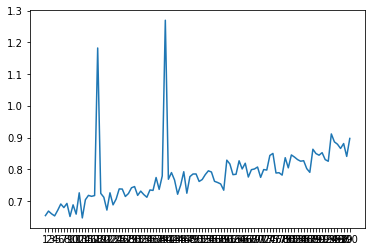

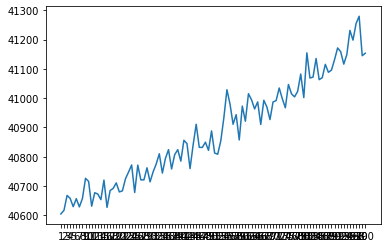

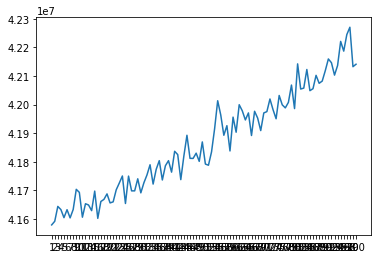

In [27]:
plot_pt_mu(*t_5g)

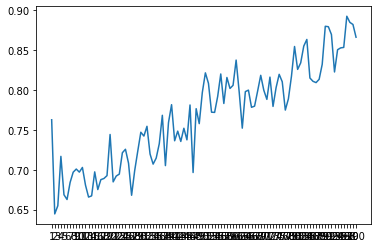

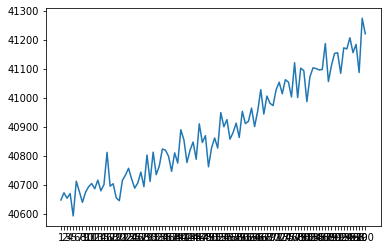

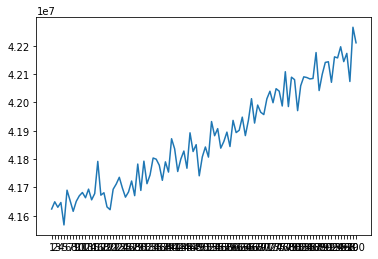

In [28]:
plot_pt_mu(*skip_5g)

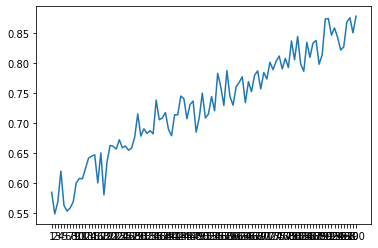

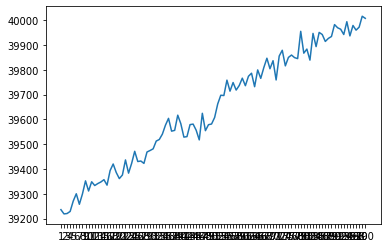

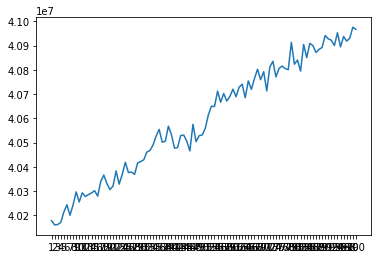

In [29]:
plot_pt_mu(*t_osm)

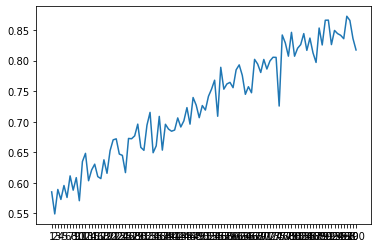

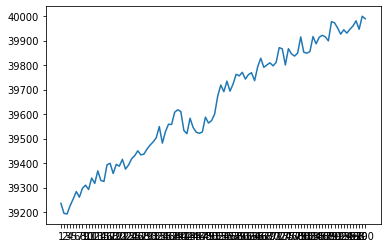

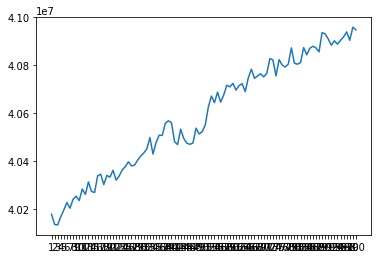

In [30]:
plot_pt_mu(*skip_osm)